# <b> New Notebook for updated Prediction Model(s) </b>
### Notebook focused on pre prediction for future Network Based modeling
> This notebook narrows in on all the original EDA that was done in the other notebooks
> Using Supplementary Table(s): <i> 1,6,12,and 13 </i>

> Import Satements

In [28]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist, squareform
#from skbio.stats.distance import mantel
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestRegressor


> CSV Filepaths (local) 

In [29]:
csv12 = '/Users/schoudhry/Desktop/IIT/Research/researchData/StableS12.csv'
csv13 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable13.csv'
csv6 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S6 S6.csv'
csv1 = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable1.csv'

> Logistical Regression

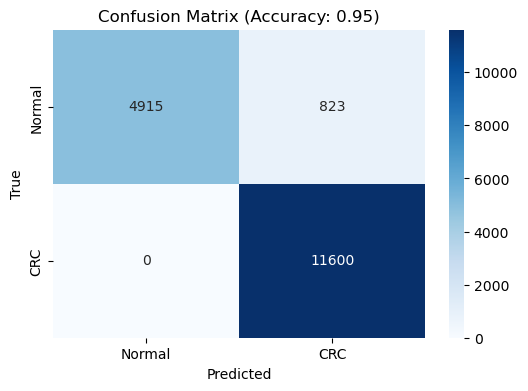

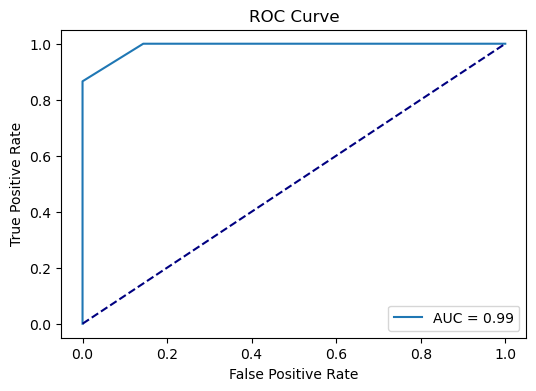

(0.9525320106125273, 0.9903741316210142)

In [30]:
# Required Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the provided paths
csv12_path = '/Users/schoudhry/Desktop/IIT/Research/researchData/StableS12.csv'
csv13_path = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable13.csv'
csv6_path = '/Users/schoudhry/Desktop/IIT/Research/researchData/Supplementary Tables S6 S6.csv'
csv1_path = '/Users/schoudhry/Desktop/IIT/Research/researchData/Stable1.csv'

df_genes = pd.read_csv(csv12_path)  # Gene expression data (S12)
df_bacteria = pd.read_csv(csv13_path)  # Bacterial abundance data (S13)
df_stable1 = pd.read_csv(csv1_path)  # CRC Status from Stable1
df_associations = pd.read_csv(csv6_path, header=1)  # Gene-bacteria associations (S6)

# Step 1: Extract gene expression for B01, B02, B03 from S12
df_genes_subset = df_genes[['Unnamed: 0', 'B01', 'B02', 'B03']].copy()
df_genes_subset.columns = ['Gene', 'B01_Expression', 'B02_Expression', 'B03_Expression']

# Step 2: Extract bacterial abundance for B01, B02, B03 from S13
df_bacteria_subset = df_bacteria[['Unnamed: 0', 'B01', 'B02', 'B03']].copy()
df_bacteria_subset.columns = ['Bacteria', 'B01_Abundance', 'B02_Abundance', 'B03_Abundance']

# Step 3: Merge gene expression and bacterial abundance for B01, B02, B03
df_merged_b01 = pd.concat([df_genes_subset[['B01_Expression']], df_bacteria_subset[['B01_Abundance']]], axis=1)
df_merged_b02 = pd.concat([df_genes_subset[['B02_Expression']], df_bacteria_subset[['B02_Abundance']]], axis=1)
df_merged_b03 = pd.concat([df_genes_subset[['B03_Expression']], df_bacteria_subset[['B03_Abundance']]], axis=1)

# Step 4: Add CRC labels for B01, B02, B03 from Stable1
df_stable1['CRC_Status'] = df_stable1['Description'].apply(lambda x: 1 if x == 'tumor' else 0)
crc_status_b01 = df_stable1[df_stable1['Tissue.RNA.DNA_Tube_ID'] == 'B01']['CRC_Status'].values[0]
crc_status_b02 = df_stable1[df_stable1['Tissue.RNA.DNA_Tube_ID'] == 'B02']['CRC_Status'].values[0]
crc_status_b03 = df_stable1[df_stable1['Tissue.RNA.DNA_Tube_ID'] == 'B03']['CRC_Status'].values[0]

# Combine the merged data for all patients into one dataframe
df_combined = pd.concat([df_merged_b01, df_merged_b02, df_merged_b03], axis=0)
df_combined['CRC_Status'] = [crc_status_b01] * len(df_merged_b01) + [crc_status_b02] * len(df_merged_b02) + [crc_status_b03] * len(df_merged_b03)

# Step 5: Handle missing values by filling NaNs with 0
df_combined.fillna(0, inplace=True)

# Step 6: Prepare X (features) and y (target)
X = df_combined.drop(columns=['CRC_Status']).values  # Gene expression and bacterial abundance as features
y = df_combined['CRC_Status'].values  # CRC status as target

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 8: Build and train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 9: Make predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'CRC'], yticklabels=['Normal', 'CRC'])
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

# Print the accuracy and AUC for further reference
accuracy, roc_auc


Correlation Matrix:
             Actual  Predicted
Actual     1.000000   0.894329
Predicted  0.894329   1.000000

R-squared Value: 0.785621957668778


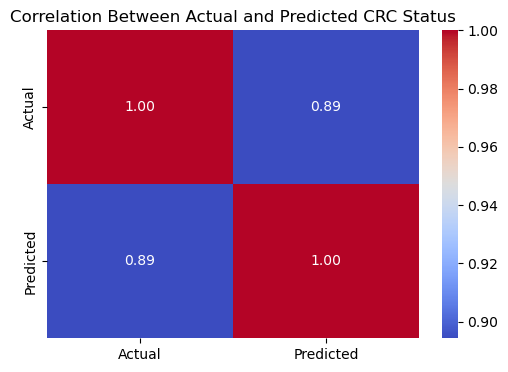

In [31]:
# Step 1: Compute the R-squared value
r_squared = r2_score(y_test, y_pred)

# Step 2: Compare predictions against actual results with a correlation matrix
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Correlation between actual and predicted values
correlation_matrix = df_comparison.corr()

# Step 3: Display the correlation matrix and R-squared value
print("Correlation Matrix:")
print(correlation_matrix)

print(f"\nR-squared Value: {r_squared}")

# Visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Actual and Predicted CRC Status')
plt.show()


Mean Squared Error: 0.031091598659970184
R-squared Value: 0.8595820859555614


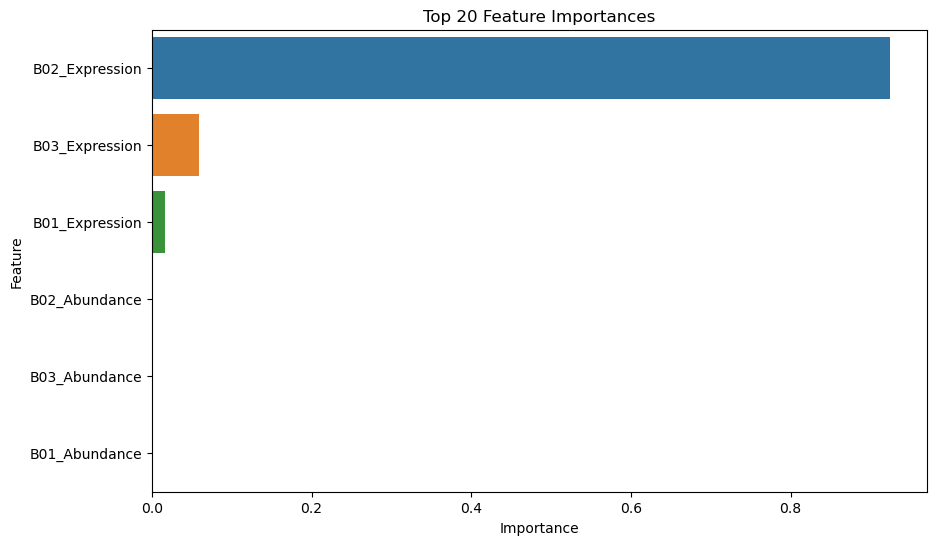

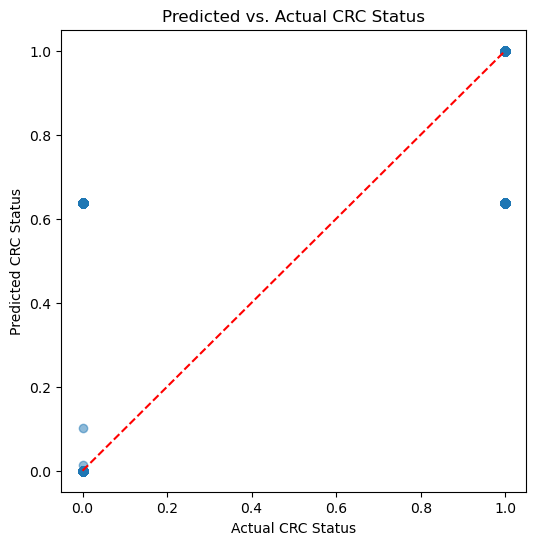

In [32]:
# Step 1: Handle missing values by filling NaNs with 0
df_combined.fillna(0, inplace=True)

# Step 2: Prepare X (features) and y (target)
X = df_combined.drop(columns=['CRC_Status']).values  # Gene expression and bacterial abundance as features
y = df_combined['CRC_Status'].values  # CRC status as target

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Build and train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = rf.predict(X_test)

# Step 6: Evaluate the model
mse = mean_squared_error(y_test, y_pred) # ???
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

# Step 7: Feature Importance
importances = rf.feature_importances_
feature_names = df_combined.drop(columns=['CRC_Status']).columns  # Use the column names of the features
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 8: Visualize the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))  # Show top 20 important features
plt.title('Top 20 Feature Importances')
plt.show()

#Plot predicted vs. actual CRC status
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.xlabel('Actual CRC Status')
plt.ylabel('Predicted CRC Status')
plt.title('Predicted vs. Actual CRC Status')
plt.show()


update

In [33]:
# Check the structure of df_combined
print(df_combined.head())       # Show the first few rows of the DataFrame
print(df_combined.columns)      # Show the column names of the DataFrame


   B01_Expression  B01_Abundance  B02_Expression  B02_Abundance  \
0           235.0          116.0             0.0            0.0   
1            23.0           86.0             0.0            0.0   
2           184.0            0.0             0.0            0.0   
3           263.0          141.0             0.0            0.0   
4            98.0           63.0             0.0            0.0   

   B03_Expression  B03_Abundance  CRC_Status  
0             0.0            0.0           1  
1             0.0            0.0           1  
2             0.0            0.0           1  
3             0.0            0.0           1  
4             0.0            0.0           1  
Index(['B01_Expression', 'B01_Abundance', 'B02_Expression', 'B02_Abundance',
       'B03_Expression', 'B03_Abundance', 'CRC_Status'],
      dtype='object')


Predicted vs Actual CRC Status for B01, B02, B03:
Row 0: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 1: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 2: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 3: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 4: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 5: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 6: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 7: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 8: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 9: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 10: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 11: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 12: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 13: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 14: Predicted CRC Status = 1.000, Actual CRC Status = 1
Row 15: Predicted CRC Status = 1.000, Actual CRC Status = 1


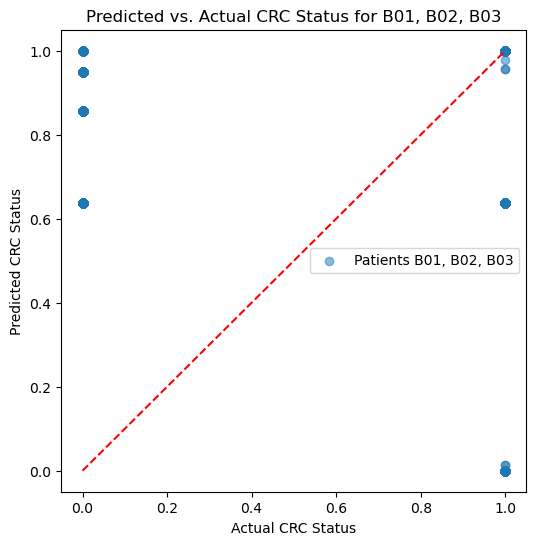

In [34]:
import numpy as np

# List of patients of interest
patients_of_interest = ['B01', 'B02', 'B03']

# Step 1: Define the relevant columns for each patient
expression_columns = [f'{patient}_Expression' for patient in patients_of_interest]
abundance_columns = [f'{patient}_Abundance' for patient in patients_of_interest]

# Combine the feature columns for these patients (Expression + Abundance)
feature_columns = expression_columns + abundance_columns

# Step 2: Create X (features) and y (target)
X_subset = df_combined[feature_columns].values  # Features: gene expression and bacterial abundance
y_actual_subset = df_combined['CRC_Status'].values  # Target: actual CRC status values

# Step 3: Use the pre-trained Random Forest model to predict CRC status for B01, B02, B03
y_pred_subset = rf.predict(X_subset)  # Assuming 'rf' is your trained RandomForest model

# Step 4: Print actual vs predicted CRC status
print("Predicted vs Actual CRC Status for B01, B02, B03:")
for i in range(len(y_actual_subset)):
    print(f"Row {i}: Predicted CRC Status = {y_pred_subset[i]:.3f}, Actual CRC Status = {y_actual_subset[i]}")

# Step 5: Plot predicted vs actual CRC status
plt.figure(figsize=(6, 6))
plt.scatter(y_actual_subset, y_pred_subset, alpha=0.5, label='Patients B01, B02, B03')
plt.plot([min(y_actual_subset), max(y_actual_subset)], [min(y_actual_subset), max(y_actual_subset)], color='red', linestyle='--')  # Diagonal line for perfect predictions
plt.xlabel('Actual CRC Status')
plt.ylabel('Predicted CRC Status')
plt.title('Predicted vs. Actual CRC Status for B01, B02, B03')
plt.legend()
plt.show()





Error Analysis

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the Random Forest model has been trained and predictions (y_pred_subset) have been made
# y_actual_subset contains the actual CRC status values

# Step 1: Calculate absolute errors
errors = abs(y_pred_subset - y_actual_subset)

# Step 2: Create a DataFrame to store actual, predicted, and error values
error_df = pd.DataFrame({
    'Actual_CRC_Status': y_actual_subset,
    'Predicted_CRC_Status': y_pred_subset,
    'Error': errors
})

# Step 3: Sort the errors to find the largest discrepancies
error_df_sorted = error_df.sort_values(by='Error', ascending=False).reset_index(drop=True)

# Step 4: Print the rows with the largest prediction errors
print("Top 5 prediction errors:")
print(error_df_sorted.head(5))

# Step 5: Analyze the corresponding feature values for the biggest errors
# Assuming df_combined contains the feature data (gene expressions and bacterial abundance)
df_with_errors = df_combined.copy()  # Make a copy of the original data
df_with_errors['Actual_CRC_Status'] = y_actual_subset
df_with_errors['Predicted_CRC_Status'] = y_pred_subset
df_with_errors['Error'] = errors

# Print feature data for the top 5 largest errors
print("Feature data for the top 5 errors:")
top_5_errors = df_with_errors.loc[error_df_sorted.index[:5]]  # Get the first 5 rows based on sorted errors
print(top_5_errors)


Top 5 prediction errors:
   Actual_CRC_Status  Predicted_CRC_Status  Error
0                  1                   0.0    1.0
1                  1                   0.0    1.0
2                  1                   0.0    1.0
3                  1                   0.0    1.0
4                  1                   0.0    1.0
Feature data for the top 5 errors:
   B01_Expression  B01_Abundance  B02_Expression  B02_Abundance  \
0           235.0          116.0             0.0            0.0   
0             0.0            0.0           815.0           66.0   
0             0.0            0.0             0.0            0.0   
1            23.0           86.0             0.0            0.0   
1             0.0            0.0            15.0          186.0   
1             0.0            0.0             0.0            0.0   
2           184.0            0.0             0.0            0.0   
2             0.0            0.0           166.0            0.0   
2             0.0            0.0     

Key Takeaways:
Consistent Underestimation:

The model is frequently predicting 0.0 (no CRC), even when the actual CRC status is 1.0 (positive). This suggests that the model might be biased towards under-predicting CRC or not effectively learning the relationship between the features and CRC status.
Feature Patterns:

In some cases, high gene expression or bacterial abundance (e.g., B02_Expression in Row 1) does not lead to the correct prediction. This suggests that either the features need more preprocessing, or the model isn't properly weighting these features.
Improvement Strategies:

Balance the training data: If the training data has an imbalance (e.g., more CRC-negative cases than CRC-positive), the model might be biased toward predicting 0 (no CRC).
Feature engineering: Some features may need scaling, transformations, or combining to improve their predictive power.
Hyperparameter tuning: The Random Forest model might benefit from further tuning (e.g., adjusting the number of trees, max depth, etc.).

In [36]:
from sklearn.metrics import classification_report, roc_auc_score

# After making predictions
y_pred = rf_model.predict(X_test)

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))


NameError: name 'rf_model' is not defined